# Diabetic Retinopathy

## Information

### Diabetic Retinopathy

It is a complication of diabetes, casued by high blood sugar levels damaging the back of the eye (retina). It can cause blindness if left undiagnosed and untreated. 
(https://www.nhs.uk/conditions/diabetic-retinopathy/)

### Data Set Description

This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not. All features represent either a detected lesion, a descriptive feature of a anatomical part or an image-level descriptor.

### Attribute Information

A) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.

B) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.

C - H) The results of MA (microaneurysm) detection. Each feature value stand for the number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.

I - P) contain the same information as C-H) for exudates. However,
as exudates are represented by a set of points rather than the number of
pixels constructing the lesions, these features are normalized by dividing the
number of lesions with the diameter of the ROI to compensate different image
sizes.

Q) The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the diameter of the ROI.

R) The diameter of the optic disc.

S) The binary result of the AM/FM-based classification.

T) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.

## Model - Logistic Regression

### Import required libraries

In [117]:
import numpy as np
import pandas as pd

### Read the CSV file

In [118]:
raw_data = pd.read_csv("data.csv")
raw_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [119]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1150 non-null   int64  
 1   B       1150 non-null   int64  
 2   C       1150 non-null   int64  
 3   D       1150 non-null   int64  
 4   E       1150 non-null   int64  
 5   F       1150 non-null   int64  
 6   G       1150 non-null   int64  
 7   H       1150 non-null   int64  
 8   I       1150 non-null   float64
 9   J       1150 non-null   float64
 10  K       1150 non-null   float64
 11  L       1150 non-null   float64
 12  M       1150 non-null   float64
 13  N       1150 non-null   float64
 14  O       1150 non-null   float64
 15  P       1150 non-null   float64
 16  Q       1150 non-null   float64
 17  R       1150 non-null   float64
 18  S       1150 non-null   int64  
 19  T       1150 non-null   int64  
dtypes: float64(10), int64(10)
memory usage: 179.8 KB


Since each column has exactly 1150 non-null values, we can determine that there are no null values that need to be removed. It was also mentioned that some of the columns of the data have already been normalized.

### Pre-processing the data

At a quick glance of the data, we can see that in the columns that do not have binary values, there are values of 0. It can be assumed that these values of 0 were meant to be empty, but they are set to 0 as a placeholder. Therefore, the data will need to be cleaned of these values before proceeding in order to get a more accurate model.

Also, it will be a bit confusing going forward if the column values remain as arbitary letters that are difficult to identify at a glance, so these will be changed into more appropriate labels.

In [129]:
renamed_data = raw_data.rename(columns = {
    "A": "qa",
    "B": "ps",
    "C": "ma.a",
    "D": "ma.b",
    "E": "ma.c",
    "F": "ma.d",
    "G": "ma.e",
    "H": "ma.f",
    "I": "ex.a",
    "J": "ex.b",
    "K": "ex.c",
    "L": "ex.d",
    "M": "ex.e",
    "N": "ex.f",
    "O": "ex.g",
    "P": "ex.h",
    "Q": "dd",
    "R": "dod",
    "S": "amfm",
    "T": "dr"
})

data = renamed_data[renamed_data["ex.a"] != 0]
data = data[data["ex.b"] != 0]
data = data[data["ex.c"] != 0]
data = data[data["ex.d"] != 0]
data = data[data["ex.e"] != 0]
data = data[data["ex.f"] != 0]
data = data[data["ex.g"] != 0]
data = data[data["ex.h"] != 0]

### Scaling the data

In [146]:
targets = data.loc[:, ["dr"]]
unscaled_inputs = data.iloc[:, 0:-1]

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(unscaled_inputs)
scaled_inputs = scaler.transform(unscaled_inputs)

The data is scaled to improve the performance of the model.

### Splitting the data into train and test

In [148]:
from sklearn.model_selection import train_test_split

train_test_split(scaled_inputs, targets)
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.7, random_state = 5)

This is where we split the data into training and testing data, which we will use to evaluate the significance and accuracy of our model (also known as cross-validation). From the sklearn.model_selection library, we import the train_test_split method which is used to split the testing and training data. The data is split so that overfitting can be reduced within the data model.

<i>Train_size</i> is used to set the training data size. A value of 0.7 means that the train-test split is 70:30.

<i>Random_state</i> helps maintain consistency when running as we will get the same split every time. This is the same as inputting a seed.

### Training the model

In [151]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train.values.ravel())
lr.score(x_train, y_train)

0.8246268656716418

The scaled data is then fed to the logistic regression model, and a model has been obtained. As you can see we have obtained a score of 0.82, or 82% which is not bad. However we will need to test our model to see if this obtained accuracy is accurate.

### Finding the intercept and coefficients

In [135]:
variable_name = inputs.columns.values
summary_table = pd.DataFrame(columns = ["Variable Name"], data = variable_name)
summary_table["Coefficient"] = np.transpose(lr.coef_)
summary_table["Odds Ratio"] = np.exp(summary_table.Coefficient)
summary_table

,Variable Name,Coefficient,Odds Ratio
0,qa,0.000000,1.000000
1,ps,-0.440105,0.643969
2,ma.a,2.267613,9.656324
3,ma.b,0.914622,2.495832
4,ma.c,0.115852,1.122830
5,ma.d,-0.599861,0.548888
6,ma.e,-0.298140,0.742198
7,ma.f,-0.951826,0.386035
8,ex.a,0.565952,1.761123
9,ex.b,-0.230303,0.794293


This table lists all the coefficients and the odds ratio of each variable in the model. This can give us a general idea of the level of impact that each variable has on determining if one has diabetes or not. The odds ratio tells us that at low confidence levels, high levels of MAs are the strongest indicators of one having diabetes, whereas at high confidence levels this changes to the exudate levels, since these values are the largest.

### Evaluating the model (via testing)

In [156]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

lr.score(x_test, y_test)

# cm = confusion_matrix(x_test, y_test.values.ravel())
# print("Confusion Matrix:\n", cm)

0.7327586206896551

Using the testing data that we obtained from splitting the initial data up, we can test our model. The accuracy of this model is 0.73, or 73%, which differs from the 82% accuracy that we obtained earlier. However they are similar enough in range to say that this is a good model. In the literature review, it was mentioned that an accuracy score of 92.3% was achieved, which I was unable to get close to. This may have been due to either the quality of the data, or the method that I have employed.

### Graphing the logistic regression curve

To visually represent the model, we can plot the data onto a scatter graph and then draw a logistic regression curve over the data using the seaborn library. Each column can be used to plot a logistic regression curve, but for the purpose of this demonstration I have used the exudate detection levels and the micro aneurysm levels.

#### Exudate Detection

[Text(0.5, 0, 'Exudate Detection'), Text(0, 0.5, 'Probability of DR')]

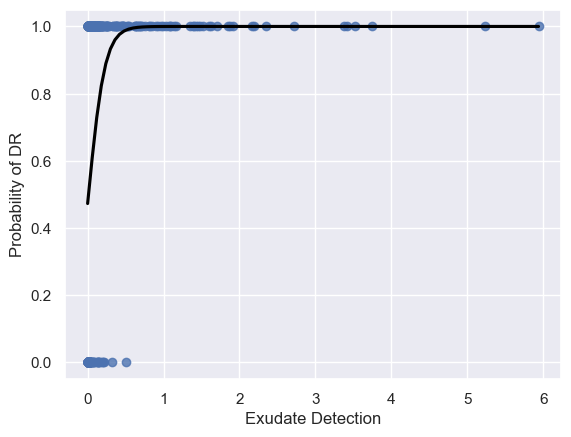

In [159]:
import seaborn as sns

x = data["ex.g"]
y = data["dr"]

lrc = sns.regplot(x = x, y = y, data = data, logistic = True, ci = None, line_kws = {"color" : "black"})
lrc.set(xlabel = "Exudate Detection", ylabel = "Probability of DR")

#### MA Detection

[Text(0.5, 0, 'MA Detection'), Text(0, 0.5, 'Probability of DR')]

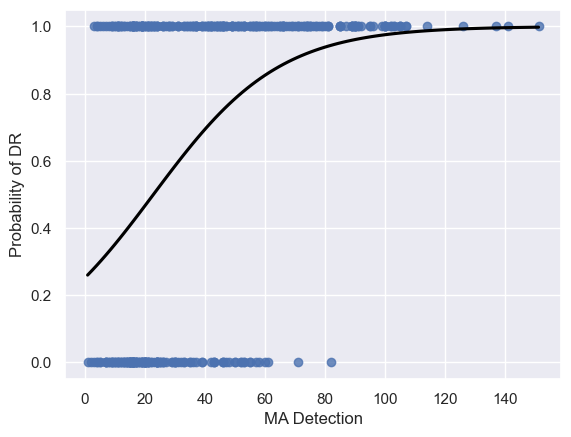

In [137]:
x = data["ma.a"]

lrc = sns.regplot(x = x, y = y, data = data, logistic = True, ci = None, line_kws = {"color" : "black"})
lrc.set(xlabel = "MA Detection", ylabel = "Probability of DR")

These graphs show us the probability chance one has of having diabetes, dependent on the respective MA/exudate levels.